# Problem 1 (PCA Theory)

## 1. PCA steps

<ol type="a">
    <li> Zero-mean dataset: $\bar{X} = X - M$ </li>
    <li> Covariance matrix: $\Sigma = \frac{1}{N} \sum_{n = 1}^{N} \bar{x}_{n} \bar{x}_{n}^{T} $ </li>
    <li> Eigendecomposition of the covariance matrix of our data: $\Sigma = U \Lambda U^{T}, U \in \mathbb{R}^{d \times k}, \Lambda \in \mathbb{R}^{k \times k} \> \text{(a diagonal matrix containing the eigenvalues)}, \Sigma \in \mathbb{R}^{d \times d} $ </li>
    <li>Projected dataset: $\bar{Z} = U^{T} \bar{X}; Z \in \mathbb{R}^{k \times n}$</li>
    <li>Approximate $\bar{X}$ (e.g. for error computations): $\boldsymbol{\mathrm{\tilde{\bar{X}}}} = U \cdot \bar{Z}$</li>
</ol>

## 2. Eigenvalue spectrum

 1. Intrinsic dimensionality is high because of slow dropoff.
 2. No, because the dropoff is relatively slow & no knee
 3. Should use D=100, i.e. no dimensionality reduction.

## 3. Covariance
1B: No correlation, but $x_2$ (vertical part) has higher variance than $x_1$, the horizontal part.

2E: Identical variance, but negative correlation, so we need an ellipse "pointing" from top-left to bottom right.

3C: Unit variance, no covariance => just a circle.

## 4. 
a) Having a diagonalized covariance matrix means that there's no redundant information. ?

b) ??

c) ??

# Problem 2 (PCA for Image Analysis)

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image

In [2]:
# Load data

image_dir = "data/CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


In [3]:
def plot_gallery(images, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits.
    
    Sniped from the sklearn face classification tutorial.
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(len(images), n_row * n_col)):
        plt.subplot(n_row, n_col, i + 1)
        # The (h, w) ordering DOES MATTER! A lot!
        # If it's wrong, you get seemingly meaningless streaks!
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title("$\lambda_{%d}$" % (i + 1), size=24)
        plt.xticks(())
        plt.yticks(())

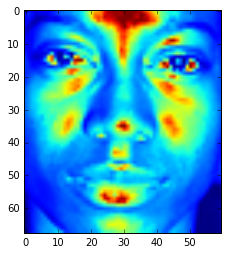

In [4]:
plt.imshow(imgs[20])

In [5]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width * height

# Compute input matrix X
X_list = [np.reshape(imgs[i].getdata(), (wh)) for i in range(n)]
# Ensure that each image is a **column** (not 100% necessary, but useful
# for following the steps in the slides).
X = np.array(X_list).T
print(X.shape)

dimension = X.shape[0]
samples = X.shape[1]

(4080, 38)


In [6]:
# Compute the zero-mean dataset, and perform a sanity check.
mu = np.mean(X, axis=0)
X_bar = X - mu
print(np.mean(X_bar))

1.46654847422e-15


In [7]:
# Compute the covariance matrix described in the lecture
# Note: also called scatter matrix in certain places.
# It is different from what numpy's 'cov' would compute, but works.
scatter_matrix = np.zeros([dimension, dimension])
for row in X_bar.T:
    outer = np.outer(row, row)
    scatter_matrix += outer
    
scatter_matrix /= samples

(4080, 4080)


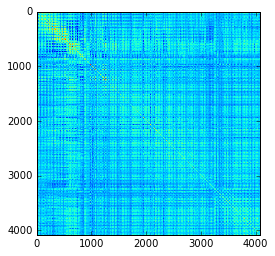

In [14]:
cov = np.cov(X)
print(cov.shape)
plt.imshow(cov)

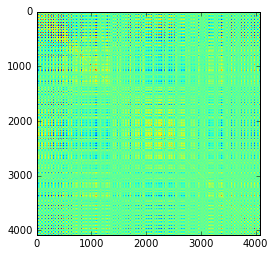

In [16]:
plt.imshowoscatter_matrixcatter_matrix)

## Using vanilla numpy

In [15]:
# This is where the magic happens!

# Note: we're operating on a square matrix.
# We need the matrix to be square (and diagonalizable) to perform the eigendecomposition.
# eig_val, eig_vec = np.linalg.eig(scatter_matrix)
eig_val, eig_vec = np.linalg.eig(cov)

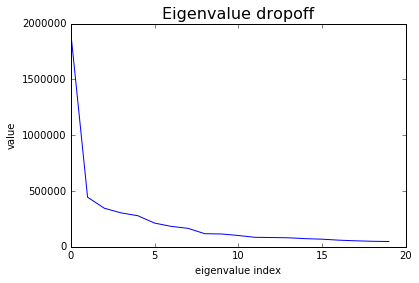

In [17]:
# Note: despite what the numpy documentation says, the returned
# eigenpairs seem to be ordered by the eigenvalue's magnitude.

# Ensure we're working with reals (imaginary parts should be negligible).
eig_val = np.real(eig_val)
eig_vec = np.real(eig_vec.T)
mlen = min(len(eig_val), 20)
plt.plot(range(0, mlen), eig_val[:mlen])
ax = plt.gca()
ax.set_xlabel("eigenvalue index")
ax.set_ylabel("value")
ax.set_title("Eigenvalue dropoff", size=16)

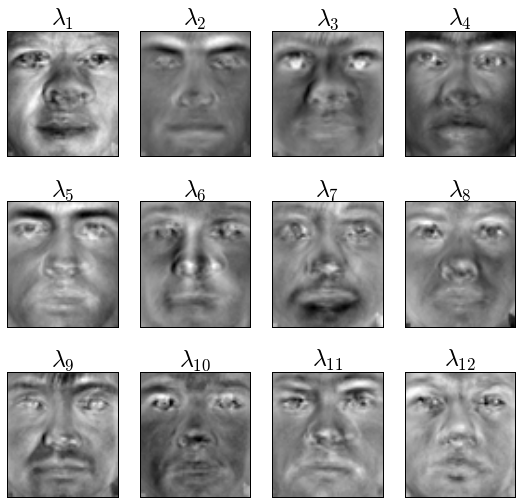

In [18]:
# Show the computed eigenfaces.

plot_gallery(eig_vec, height, width)

## Using numpy's SVD utility

In [11]:
u, s, v = np.linalg.svd(X_bar, full_matrices=False)

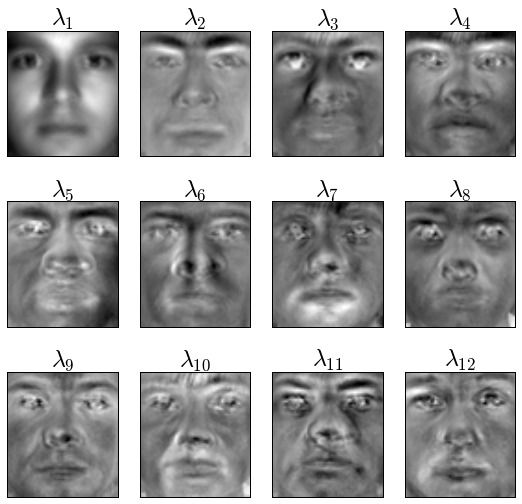

In [12]:
plot_gallery(u.T, height, width)

## Using sklearn's PCA

In [263]:
from sklearn.decomposition import PCA

In [354]:
n_components = 10
pca = PCA(n_components=n_components)

In [387]:
X = ss
pca.fit(X)

PCA(copy=True, n_components=10, whiten=False)

In [388]:
if hasattr(pca, 'n_components_'):
    resulting_components = pca.n_components_
else:
    resulting_components = n_components
print("I came up with %d components." % resulting_components)
print(pca.components_.shape)

I came up with 10 components.
(10, 4080)


In [389]:
eigenfaces = pca.components_.reshape((resulting_components, width, height))

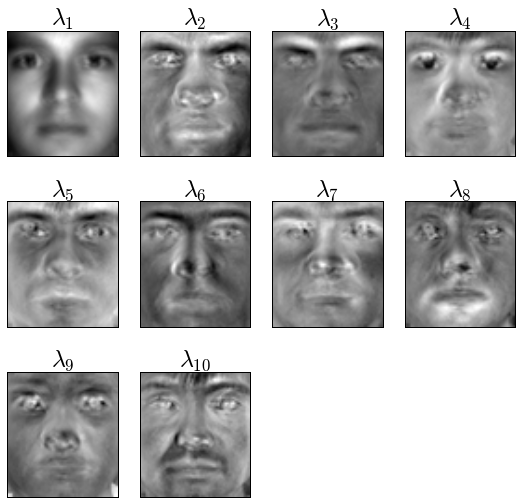

In [391]:
plot_gallery(eigenfaces, height, width)